<div style="text-align: center;">
    <a href="https://www.ip-paris.fr/">
        <img border="0" src="https://drive.google.com/uc?export=view&id=1Pu9Ua3kCSZaqwi3QdlbDFFcJTozC0F0N" width="90%"></a>
</div>

---

<div style="text-align: center">
    <h1>Data Camp project 2020</h1>
    <h2><i>Ramp on mind big data</i></h2>
        
</div>

<div style="text-align: center">
<img src="https://drive.google.com/uc?export=view&id=1JSUGBPkZH9yhKvxdtDj3iuX8brVFCmOQ">
</div>

<div style="text-align: right">
    <em>
        Authors : Ahmed L. - Mohamed E. - Rania F. - Yassine F.
    </em>
</div>

---

# Table of content
1. [Introduction](#Introduction)
    - [Description](#Introduction)
    - [Objectives](#Objectives)
    - [Brief on the original data](#Original_Data)
    - [Transformations and final dataset](#Transformations_and_final_set)   
2. [Data exploration](#Data_exploration)
    - [Data format](#Data_Format)
    - [Signals visualization](#Visualizing_signals)
    - [Data distribution](#Data_distribution)
3. [Feature extraction](#Feature_extraction)
    - [Fourier Transform](#Fourier_Transform)
    - [Wavelets](#Wavelets)
4. [Estimator: Multi estimators](#Estimator)
5. [Submission](#Submission)

---

# Introduction

This project is based on **EEG**s signals. [Electroencephalography](https://en.wikipedia.org/wiki/Electroencephalography) is a monitoring method to record electrical activity of the brain. Non-invasive electrodes are placed on different locations on the scalp and the signals are retrieved. 

The goal of this challenge is to be able to predict a seen digit **from 0 to 9** based on the signals recorded from the brain of a subject who saw the same digit, and so is thinking about it. Which leads to the name of our dataset The ["MNIST of Brain Digits"](http://www.mindbigdata.com/opendb/?fbclid=IwAR0xGKJWvMIx1Q5cuhGFEBJlI_J3vHPCFuYG_57tDqfBXyJj3WPFKx2qUQs). It originally contains over a million brain signals, of 2 seconds each, captured with the stimulus of seeing a digit form **0** to **9**. 

These signals were captured using **4 different EEGs devices**, [NeuroSky Mindwave](https://store.neurosky.com/), [emotiv EPOC](https://www.emotiv.com/epoc/), [Interaxon Muse](https://choosemuse.com/) and [Emotiv Insight](https://www.emotiv.com/insight/), covering a total of 19 brain locations.

Some signals were registered **randomly**, when the subject was not thinking of any particular digit. The corresponding signals will be labelled **-1**. 

Which leads as to deal with a **multi-classification** problem of a total of **11** classes: **-1, 0, .., 9**.

<div class="alert alert-block alert-warning">
<b>Heads up!</b> This challenge is a hard one, first, because of the complex structure of the data, second, because the task of predicting what a person is thinking about is not so trivial. We don't expect the final score to be high and research is still being conducted in this field.
</div>

# Objectives

<div>
    While it is very interesting to try to contribute to the recent studies and improve the accuracy, this project would serve as practice and sculpture of many other skills:<br>
<ul>
    <li>To work and be able to work with complex data structure, such as time-series.</li>
    <li>To learn to extract interesting features from complex data.</li>
    <li>To implement and combine multi-estimators that deal well with each category.</li>
    <li>To work on and contribute to a challenging task.</li>
</ul>
</div>

# Brief on the original data

The original data contains raw signals with no further pre-processing, which means that they come as they are read from the EEG device. Each device has a different number of **channels**. For each experience; the act of seeing a certain digit, we have as many events as the number of channels.

# Transformation and Final set

We decided to keep the raw aspect of the data, but to change however, its structure and take into consideration that for each experience, many events are registered and should be grouped together. In brief, we now have for each experience, a **list** containing the different signals corresponding to different channels.

Finally, we concatenated the datasets coming from the **4** devices, shuffled the rows, and made sure the signal values are **floats** so don't worry about that.

In [1]:
import pandas as pd
from problem import get_train_data
X, y = get_train_data()

In [2]:
X.head()

,device,size,signals,channels
0,MU,459,"[[512.0, 518.0, 519.0, 518.0, 517.0, 520.0, 52...","['TP9', 'FP1', 'FP2', 'TP10']"
1,MW,953,"[[17.0, 27.0, 41.0, 48.0, 54.0, 56.0, 48.0, 36...",['FP1']
2,MW,952,"[[57.0, 56.0, 41.0, 10.0, 3.0, 21.0, 40.0, 42....",['FP1']
3,MW,953,"[[35.0, 25.0, 25.0, 28.0, 26.0, 20.0, 23.0, 35...",['FP1']
4,MW,1015,"[[23.0, 37.0, 50.0, 59.0, 66.0, 59.0, 57.0, 58...",['FP1']


In [3]:
print(X.shape)

(7144, 4)


---

# Data Format

<div>
As you can see, there aren't many features in the dataset. The difficulty lays in the manipulation and the capacity to exploit the complexe structure of the signals. Let us explain each feature.<br>
    <ul>
        <li><b>device:</b> This is the device used to record the signal. As we've said before, there is a total of 4 different devices. It is a 2 character string; <b>"MW"</b> for MindWave, <b>"EP"</b> for Emotive Epoc, <b>"MU"</b> for Interaxon Muse & <b>"IN"</b> for Emotiv Insight.</li>
        <br>
        <li><b>size:</b> This is the length of the recorded signal for every channel. Signals are recorded for a period of 2 seconds, in different channels. since the Hz of each device varies, in "theory" the value is close to 512Hz for MW, 128Hz for EP, 220Hz for MU & 128Hz for IN, for each of the 2 seconds</li>
            <br>
        <li><b>signals:</b> A list of a coma separated sets of numbers, with the time-series amplitude of the signal for each channel, each device uses a different precision to identify the electrical potential captured from the brain: integers in the case of MW & MU or real numbers in the case of EP & IN. All were converted to floats</li>
        <br>
            <li><b>channels:</b> A string, to indentify the 10/20 brain location of the signal, with possible values:<br><br>
                <ul>
                    <li><b>Mindwave:</b> "FP1"</li>
                    <li><b>EPOC:</b> "AF3, "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"</li>
                    <li><b>Muse:</b> "TP9,"FP1","FP2", "TP10"</li>
                    <li><b>Insight:</b> "AF3,"AF4","T7","T8","PZ" </li>
                </ul>
            </li>
        <br>
    </ul>
</div>

# Visualizing Signals

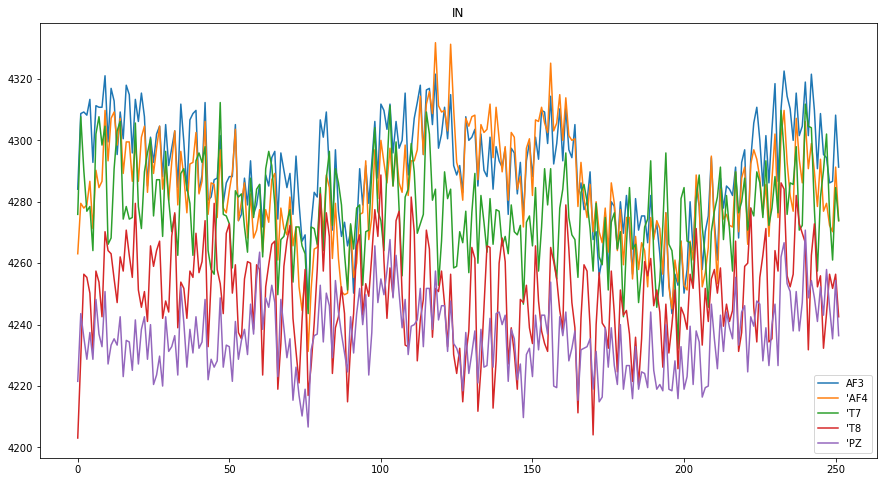

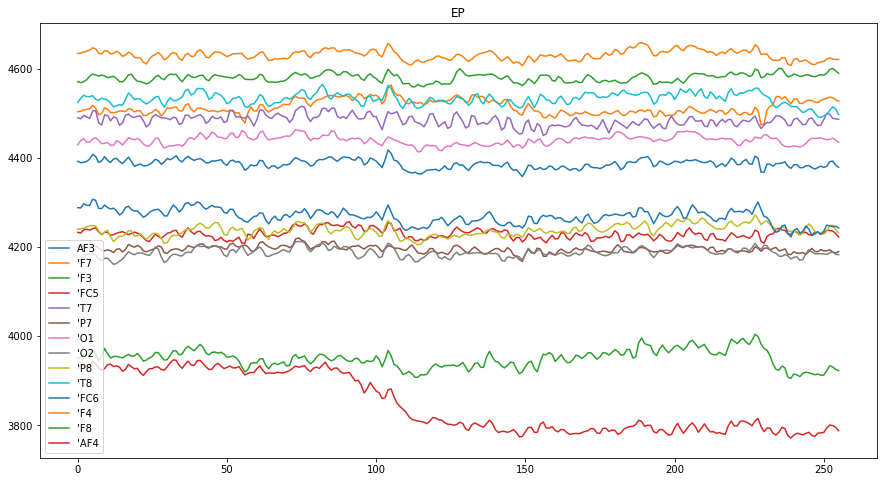

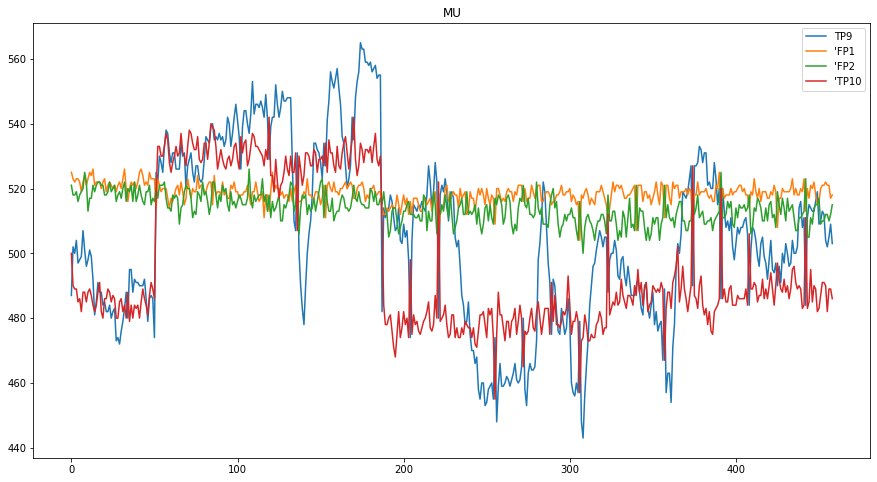

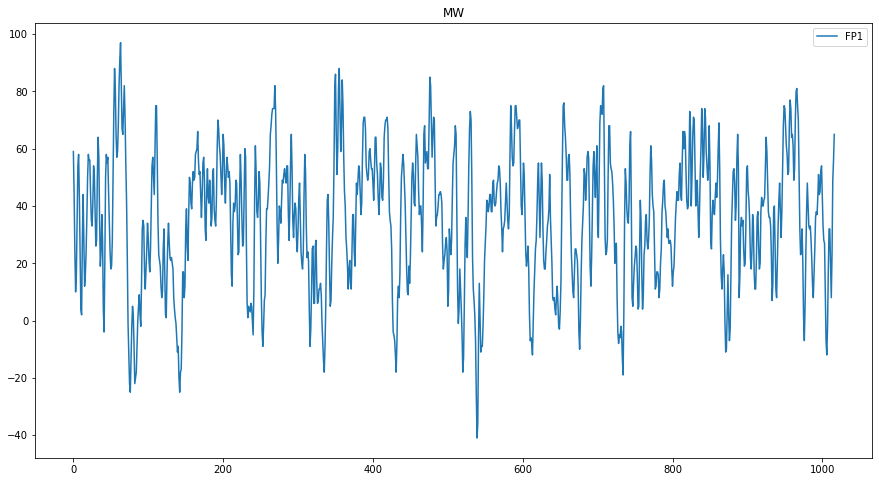

In [5]:
import matplotlib.pyplot as plt
index = 80 # careful not to go out of bounds for some devices

mw_obs = X.loc[X['device'] == 'MW'].iloc[index]
ep_obs = X.loc[X['device'] == 'EP'].iloc[index]
mu_obs = X.loc[X['device'] == 'MU'].iloc[index]
in_obs = X.loc[X['device'] == 'IN'].iloc[index]

signals = [in_obs, ep_obs, mu_obs, mw_obs]

for i, obs in enumerate(signals):
    plt.figure(figsize=(15,8))
    for j, signal in enumerate(obs['signals']):
            labels = obs['channels'][1:-1].split(',')
            plt.plot(signal, label=labels[j][1:-1])
            plt.title(obs['device'])
            plt.legend(loc='best')
    plt.show()

# Data distribution

---

# Fourier Transform

In mathematics, the discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. The interval at which the DTFT is sampled is the reciprocal of the duration of the input sequence. An inverse DFT is a Fourier series, using the DTFT samples as coefficients of complex sinusoids at the corresponding DTFT frequencies. It has the same sample-values as the original input sequence. The DFT is therefore said to be a frequency domain representation of the original input sequence. If the original sequence spans all the non-zero values of a function, its DTFT is continuous (and periodic), and the DFT provides discrete samples of one cycle. If the original sequence is one cycle of a periodic function, the DFT provides all the non-zero values of one DTFT cycle.

The DFT is the most important discrete transform, used to perform Fourier analysis in many practical applications. In digital signal processing, the function is any quantity or signal that varies over time, such as the pressure of a sound wave, a radio signal, or daily temperature readings, sampled over a finite time interval (often defined by a window function). In image processing, the samples can be the values of pixels along a row or column of a raster image. The DFT is also used to efficiently solve partial differential equations, and to perform other operations such as convolutions or multiplying large integers.

The discrete Fourier transform transforms a sequence of N complex numbers 
$\left\{\mathbf {x_{n}} \right\}:=x_{0},x_{1},\ldots ,x_{N-1}$ into another sequence of complex numbers, $ \left\{\mathbf {X_{k}} \right\}:=X_{0},X_{1},\ldots ,X_{N-1},$ which is defined by

$$ {\begin{aligned}X_{k}&=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}\\&=\sum _{n=0}^{N-1}x_{n}\cdot \left[\cos \left({\frac {2\pi }{N}}kn\right)-i\cdot \sin \left({\frac {2\pi }{N}}kn\right)\right],\end{aligned}}$$


<div>
<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--GyKZe6be--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://cl.ly/3o1j163Z2E2u/download/Image%25202018-08-17%2520at%252012.17.04%2520PM.png",
height="400", display ="block", margin-left= "auto", margin-right= "auto"; width= "50%";/>
<div/>


# Wavelets

Another method to handle signals whose constituent frequencies vary over time ,a part from the Frourier transormation, is the Wavelet transormation.A big difference with the Fourier transform, where sine and cosine are used as basis functions is that for wavelets we have a family of other function such as the **Haar** family of function.

For a discrete signal 𝑥(n) from one dimension, its transformed discrete Wavelet into a 2D space is defined as:

$ D(a,b) = \frac{1}{ b}\sum_{n=0}^{N-1} x(t_{n}) \phi(\frac{t_{n}-a}{b}) \, $ where $a=\frac{k}{2^{j}}$, $b = \frac{1}{2^{j}}$, j is the level of the transformation and k is a caracteristic of the family of wavelet function (Haar basis in our case) basis.


So the transform is calculated by passing it through a series of filters on the signal on different levels.

  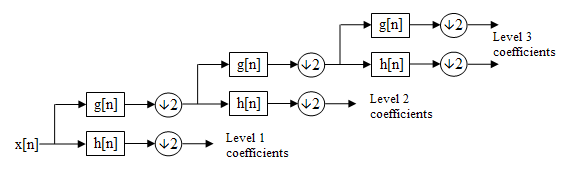

The principle of this feature extraction method is as follow:
- First, we standarize the EEG signal
- Then, we do a multi-level wavelet decomposition of the signal (if it is multi-dimensional with $n$ dimension, we apply it to every signal), let's say we do a $k$-level decomposition.
- Finally, the features we consider are a statistical description of the wavelet coefficients obtained for each level (mean, max, min, quartiles, standard deviation) which result into 7 features for each level. Therefore, the final number of features extracted is: $n \times (k+1) \times 7$


---

# Estimators

The dataset contains data from experiments conducted with $4$ different devices, namely **MindWave**, **EPOC**, **Muse** and **Insight**. Each of those device uses a different number of channels and therefore provides a different quantity of data.

In [22]:
L = [(row["device"],len(row["signals"])) for _,row in X.iterrows()]
mylist = list(dict.fromkeys(L))
mylist = sorted(mylist, key=lambda x: x[1])
print(mylist)

[('MW', 1), ('MU', 4), ('IN', 5), ('EP', 14)]


As we can see from the cell above, the range of the number of channels vary from 1 channel (for the **MindWave** device) to 14 channels (for the **EPOC** device). As a result, the shape of the feature *signals* which contains all the data retrieve from all channels varies from a device to another.
At this stage, we have a choice to make. 
- We can take statistical values (such that *mean*, *median*, *standard deviation*, etc) over all channels regardless of their number.
- However, if we want to make use of the information provided by each channel seperately in order to boost accuracy, we would have inconsistent number of features computed for rows from with different *device* values.

In order to tackle this problem, we decided to build an estimator class with 4 different sub-estimators implemented as attributes, each one of them is conceived to work with rows associated to experiments conducted with a specific device.

---

# Submission

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from numpy.fft import fft, fftfreq


class DemocracyEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.categorical_transformer = OneHotEncoder()
        self.categorical_feature = ['device']
        self.signals_feature = ['signals']
        self.devices = ["MW", "EP", "IN", "MU"]
        self.estimators = {}
        self.transformers = {}
        for device in self.devices:
            self.estimators[device] = GradientBoostingClassifier()
            self.transformers[device] = ColumnTransformer(
                transformers=[
                    ('num', FunctionTransformer(
                        lambda X: feature_extractor(X)), self.signals_feature),
                ])

    def fit(self, X, y):
        X_dict = {}
        y_dict = {}
        for key in self.estimators.keys():
            X_dict[key] = X.loc[X['device'] == key]
            y_dict[key] = y[X['device'] == key]

        for key in self.estimators.keys():
            print("Fitting estimator of device: ",key, "with df_train.shape=",X_dict[key].shape)
            self.transformers[key].fit(X_dict[key])
            transformed_samples = self.transformers[key].transform(X_dict[key])
            self.estimators[key].fit(transformed_samples, y_dict[key])

        print("Fitting phase finished...")    
        return self

    def predict(self, X):
        y_pred = np.empty((X.shape[0]))
        for k in range(X.shape[0]):
            row = X.loc[[k], :]
            device = row.loc[k, "device"]
            row = self.transformers[device].transform(row)
            y_pred[k] = self.estimators[device].predict(row)
        return y_pred

    def predict_proba(self, X):
        prob_pred = np.empty((X.shape[0], 11))
        prob_pred[:] = np.nan
        n = X.shape[0]
        if n == 7144 :
            step = "Computing train score:"
        else : 
            step = "Computing cv score:"
        for k in range(n):
            row = X.loc[[k], :]
            device = row.loc[k, "device"]
            row = self.transformers[device].transform(row)
            aux = self.estimators[device].predict_proba(row)[0]
            if aux.size == 11:
                prob_pred[k, :] = aux
            else:
                prob_pred[k, :] = np.concatenate(([0], aux))
            if k%500 == 0:
                print(step,k,"/",n)
        return np.array(prob_pred)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == np.array(y))


def feature_extractor(X_df):
    X_df = X_df.reset_index(drop=True)
    try :
        n_channels = len(X_df.loc[0,"signals"])
    except:
        print(X_df)
    X_df = X_df['signals']
    n_freq = 6
    n_features = 2 + n_freq
    feature_array = np.zeros((len(X_df), n_channels*n_features))
    for k, (_, x) in enumerate(X_df.iteritems()):
        len_list = len(x[0])
        # x is a multi-channel signals
        for i in range(n_channels):
            ft = fft(x[i])
            freqs_ft = fftfreq(len_list)
            ft, freqs_ft = ft[freqs_ft > 0], freqs_ft[freqs_ft > 0]
            magnitude_spectrum = np.abs(ft)
            indices = (-magnitude_spectrum).argsort()[:n_freq]
            freqs = freqs_ft[indices]
            feature_array[k, 8*i:(8*(i+1))] = np.concatenate(
                (freqs, np.mean(x[i]).reshape(-1), np.std(x[i]).reshape(-1)))
    return feature_array


clf = Pipeline(steps=[('classifier', DemocracyEstimator())])


def get_estimator():
    return clf